In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px


In [2]:
df = pd.read_csv("selected_features.csv")
df.head()


,LotFrontage,ZoningScore,EVI,LotArea,Price_per_m^2_norm,PDI,MSZoning_RL,LotConfig_CulDSac,LandContour_HLS,LotShape_IR2,Condition1_Norm,Condition1_Feedr,LotShape_Reg,MSZoning_RM,SalePrice
0,70.0,0.795605,0.344162,8400,0.168856,0.359777,True,False,False,False,True,False,True,False,145000
1,59.0,0.795605,0.415263,7837,0.226847,0.422145,True,False,False,False,True,False,False,False,178000
2,67.0,0.795605,0.314380,8777,0.088239,0.376095,True,False,False,False,False,True,True,False,85000
3,60.0,0.795605,0.413210,7200,0.243793,0.405462,True,False,False,False,False,True,True,False,175000
4,50.0,0.795605,0.419031,5000,0.255437,0.402378,True,False,False,False,True,False,True,False,127000


In [3]:
X = df.drop(columns=["SalePrice"])
Y = df["SalePrice"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


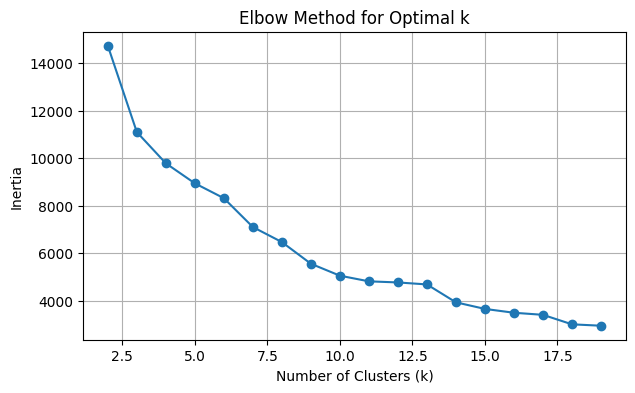

In [21]:
inertia = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [22]:
kmeans = KMeans(n_clusters=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


In [23]:
cluster_summary = df.groupby("Cluster")["SalePrice"].agg(["mean", "median", "std", "count"])
print(cluster_summary)


                  mean    median            std  count
Cluster                                               
0        180313.221030  165000.0   74525.806588    466
1        212817.828947  189000.0   88037.846906     76
2        131163.636364  122000.0   76400.845947     33
3        149018.944444  143500.0   38282.994847     54
4        117072.571429  113000.0   29667.551728     35
5        295737.500000  289500.0   60919.145526      4
6        203963.355172  188750.0   77489.880289    290
7        125905.147826  124900.0   38367.034780    115
8        249216.696970  239000.0  104503.643552     33
9        197017.354839  175700.0   51723.431618     62


In [24]:
feature_means = df.groupby("Cluster")[X.columns].mean()
feature_means


,LotFrontage,ZoningScore,EVI,LotArea,Price_per_m^2_norm,PDI,MSZoning_RL,LotConfig_CulDSac,LandContour_HLS,LotShape_IR2,Condition1_Norm,Condition1_Feedr,LotShape_Reg,MSZoning_RM
Cluster,,,,,,,,,,,,,,
0,75.254341,0.805125,0.377793,10396.515021,0.176352,0.406926,0.946352,0.000000,0.000000,0.000000,0.907725,0.000000,1.000000,0.000000
1,66.870796,0.795605,0.375172,14053.855263,0.167302,0.415385,1.000000,1.000000,0.000000,0.131579,0.855263,0.000000,0.013158,0.000000
2,69.382546,0.302287,0.234147,8550.636364,0.150399,0.233474,0.000000,0.000000,0.030303,0.060606,0.000000,0.333333,0.606061,0.909091
3,77.252288,0.778236,0.358906,11280.759259,0.152820,0.398828,0.962963,0.000000,0.000000,0.037037,0.000000,1.000000,0.722222,0.000000
4,27.207937,0.311194,0.523580,2462.800000,0.528413,0.375131,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.971429
5,98.535714,0.795605,0.314940,163513.500000,0.005148,0.656229,1.000000,0.500000,0.250000,0.500000,1.000000,0.000000,0.000000,0.000000
6,78.829267,0.798424,0.379994,11746.237931,0.182567,0.407793,0.986207,0.000000,0.000000,0.051724,0.931034,0.000000,0.000000,0.000000
7,58.666250,0.303602,0.249986,7440.800000,0.180328,0.233164,0.000000,0.000000,0.000000,0.008696,1.000000,0.000000,0.965217,0.913043
8,80.262626,0.723105,0.395702,12957.666667,0.245580,0.389560,0.848485,0.151515,1.000000,0.060606,0.909091,0.030303,0.242424,0.090909


In [25]:
fig = px.scatter(
    df,
    x="LotArea",
    y="LotFrontage",
    color="Cluster",
    size="SalePrice",
    hover_data=["SalePrice", "ZoningScore", "EVI"],
    title="Clusters by LotArea and LotFrontage (Plotly Interactive)"
)
fig.show()


In [26]:
fig_box = px.box(
    df,
    x="Cluster",
    y="SalePrice",
    color="Cluster",
    title="SalePrice distribution across clusters (Plotly Interactive)"
)
fig_box.show()

Algoritmul **K-Means** a reușit să grupeze locuințele în funcție de caracteristici similare, chiar dacă variabila `SalePrice` nu a fost utilizată în timpul antrenării. După introducerea ei în analiză, se observă diferențe clare de preț între **clustere**, ceea ce confirmă relevanța variabilelor selectate.


Clusterele cu valori mari ale prețului mediu (**Clusters 5 și 8**) conțin case situate în zone rezidențiale bune (**ZoningScore** ridicat), cu suprafețe mari de teren.
În contrast, **Clusters 2, 4 și 7** reprezintă case mai ieftine, cu loturi mici și un **ZoningScore** scăzut, corespunzând zonelor cu densitate mai mare (**MSZoning_RM** ridicat).



`Clusters 0, 1 si 6` se situează în zona mediană, caracterizate de terenuri medii, condiții normale de amplasare și prețuri medii, tipice pentru zone suburbane.

În general, distribuția ` SalePrice ` confirmă că modelul K-Means a identificat corect structuri naturale în date — clusterele mai bine poziționate și cu terenuri mari au prețuri semnificativ mai mari, în timp ce cele dense sau periferice au valori mai reduse